<a href="https://colab.research.google.com/github/annisaeka123/2341720131_ML_2025/blob/main/JS03/P1_JS03ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pratikum 1**

**Ekstraksi Fitur Pada Data Tabular**

In [2]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

data = '/content/drive/MyDrive/Pembelajaran Mesin/JS03/Titanic-Dataset.csv' # path dataset
df = pd.read_csv(data) # load dataset

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


pengecekan data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


imputasi

In [9]:
# Age - mean
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

# Cabin - "DECK"
df['Cabin'].fillna(value="DECK", inplace=True)

# Embarked - modus
df['Embarked'].fillna(value=df['Embarked'].mode, inplace=True)

/tmp/ipython-input-220269673.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(value=df['Age'].mean(), inplace=True)
/tmp/ipython-input-220269673.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

validasi hasil

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


ekstraksi fitur

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# === EKSTRAKSI FITUR ===

# 1. FamilySize: jumlah keluarga di kapal (SibSp + Parch + diri sendiri)
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# 2. Title: ambil gelar dari kolom Name (Mr, Mrs, Miss, Master, dll.)
df["Title"] = df["Name"].str.extract(r',\s*([^\.]+)\.', expand=False)
title_mapping = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs",
    "Lady": "Rare", "Countess": "Rare", "Capt": "Rare", "Col": "Rare",
    "Don": "Rare", "Dr": "Rare", "Major": "Rare", "Rev": "Rare",
    "Sir": "Rare", "Jonkheer": "Rare", "Dona": "Rare"
}
df["Title"] = df["Title"].replace(title_mapping)

# 3. AgeBin: kelompokkan usia menjadi kategori
df["AgeBin"] = pd.cut(df["Age"], bins=[0, 12, 18, 35, 60, 100],
                      labels=["Child", "Teen", "YoungAdult", "Adult", "Senior"])

# 4. CabinDeck: ambil huruf pertama dari kolom Cabin
df["CabinDeck"] = df["Cabin"].astype(str).str[0]

# 5. Fare per person: bagi harga tiket dengan jumlah keluarga
df["FarePerPerson"] = df["Fare"] / df["FamilySize"]

print("✅ Hasil Ekstraksi fitur ")
df[["Name", "Title", "Age", "AgeBin", "FamilySize", "Cabin", "CabinDeck", "FarePerPerson"]].head()


✅ Hasil Ekstraksi fitur 


,Name,Title,Age,AgeBin,FamilySize,Cabin,CabinDeck,FarePerPerson
0,"Braund, Mr. Owen Harris",Mr,22.0,YoungAdult,2,DECK,D,3.62500
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,38.0,Adult,2,C85,C,35.64165
2,"Heikkinen, Miss. Laina",Miss,26.0,YoungAdult,1,DECK,D,7.92500
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,35.0,YoungAdult,2,C123,C,26.55000
4,"Allen, Mr. William Henry",Mr,35.0,YoungAdult,1,DECK,D,8.05000


visualisasi

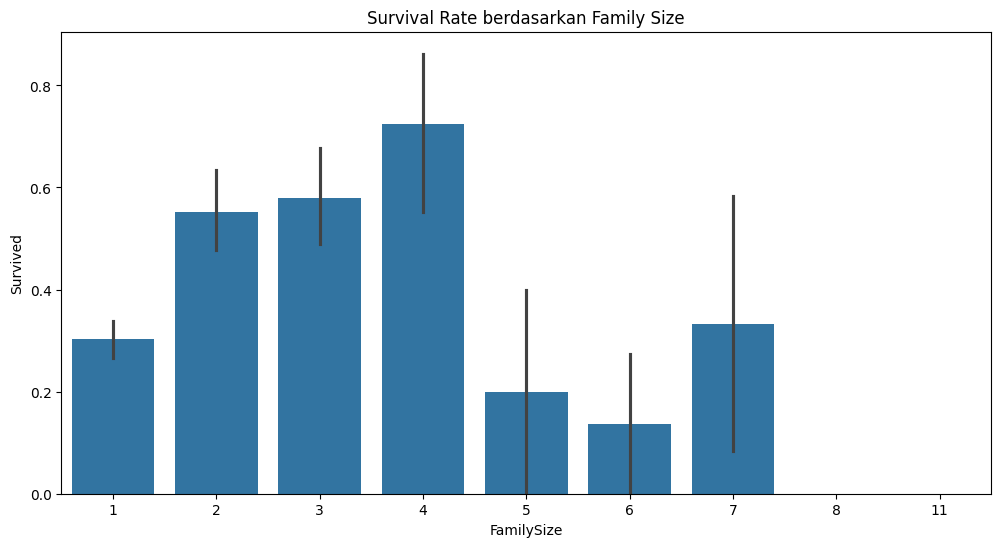

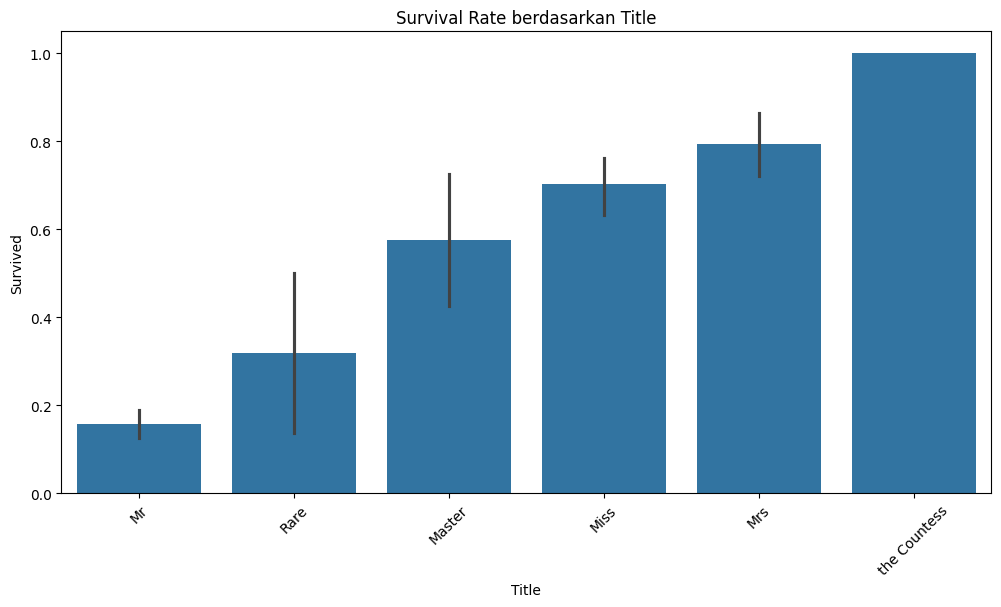

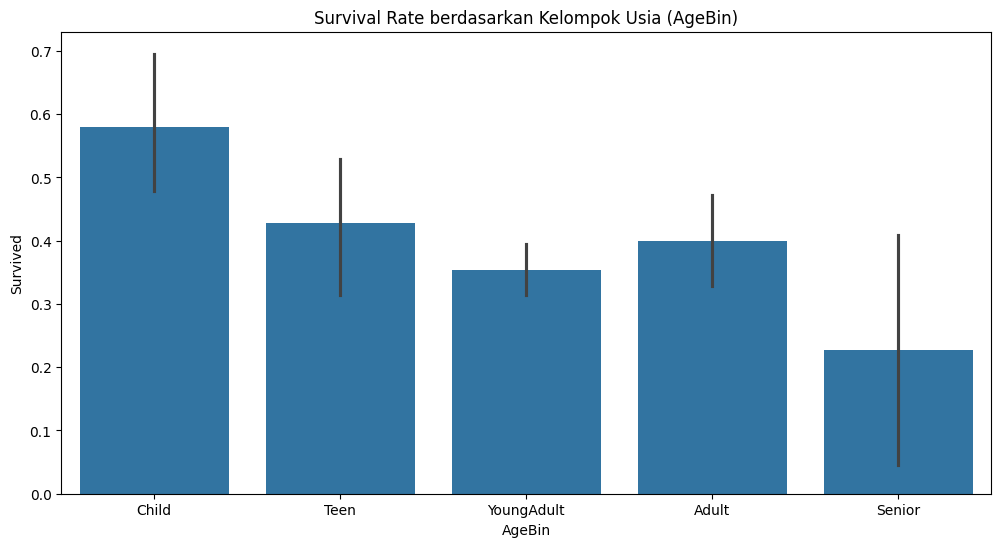

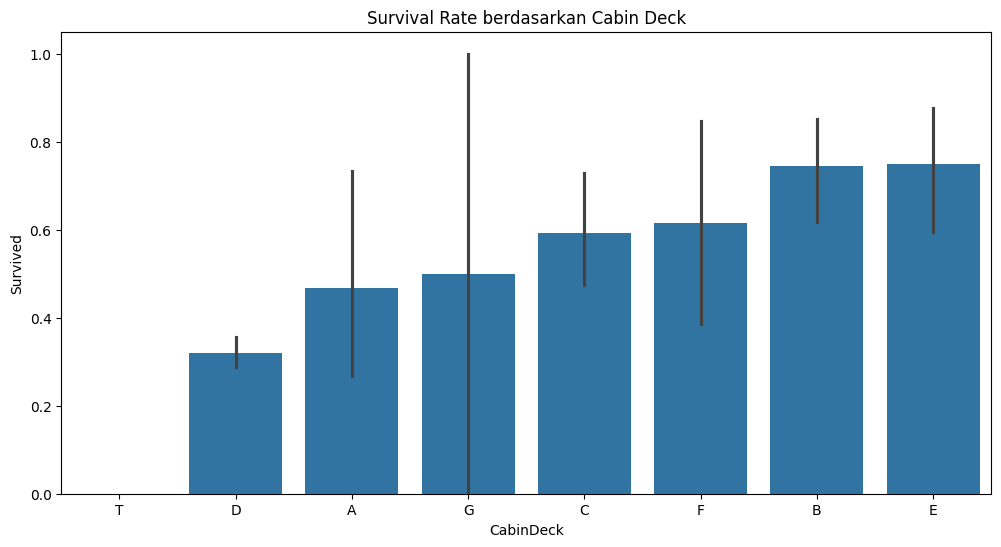

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# === VISUALISASI FITUR HASIL EKSTRAKSI ===

plt.figure(figsize=(12, 6))
sns.barplot(x="FamilySize", y="Survived", data=df)
plt.title("Survival Rate berdasarkan Family Size")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Title", y="Survived", data=df,
            order=df.groupby("Title")["Survived"].mean().sort_values().index)
plt.title("Survival Rate berdasarkan Title")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="AgeBin", y="Survived", data=df,
            order=["Child", "Teen", "YoungAdult", "Adult", "Senior"])
plt.title("Survival Rate berdasarkan Kelompok Usia (AgeBin)")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="CabinDeck", y="Survived", data=df,
            order=df.groupby("CabinDeck")["Survived"].mean().sort_values().index)
plt.title("Survival Rate berdasarkan Cabin Deck")
plt.show()
